In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('out_train_v2.csv')

In [3]:
df1 = pd.read_csv('out_test_v2.csv')

In [4]:
X = df.drop("WnvPresent", axis=1)
y = df.WnvPresent

In [5]:
X.head()
X = X.drop(['Unnamed: 0', 'Date', 'Address', 'Block', 'Street', 'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy', 'Tavg', 'Tmin', 'NumMosquitos', 'DewPoint'], axis=1)

In [6]:
test = df1.drop(['Unnamed: 0','Id', 'Date', 'Address', 'Block', 'Street', 'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy', 'Tavg', 'Tmin', 'DewPoint'], axis=1)

In [7]:
X.head()

,Species,Trap,Tmax,PrecipTotal,AvgSpeed,length_of_day
0,CULEX PIPIENS/RESTUANS,T002,88,0.0,6.5,896.0
1,CULEX RESTUANS,T002,88,0.0,6.5,896.0
2,CULEX RESTUANS,T007,88,0.0,6.5,896.0
3,CULEX PIPIENS/RESTUANS,T015,88,0.0,6.5,896.0
4,CULEX RESTUANS,T015,88,0.0,6.5,896.0


In [8]:
test.head()

,Species,Trap,Tmax,PrecipTotal,AvgSpeed,length_of_day
0,CULEX PIPIENS/RESTUANS,T002,86,0.0,10.0,910.0
1,CULEX RESTUANS,T002,86,0.0,10.0,910.0
2,CULEX PIPIENS,T002,86,0.0,10.0,910.0
3,CULEX SALINARIUS,T002,86,0.0,10.0,910.0
4,CULEX TERRITANS,T002,86,0.0,10.0,910.0


In [9]:
X.Species = X.Species.astype('category')
X.Species = X.Species.cat.codes

In [10]:
test.Species = test.Species.astype('category')
test.Species = test.Species.cat.codes

In [11]:
X.dtypes

Species             int8
Trap              object
Tmax               int64
PrecipTotal      float64
AvgSpeed         float64
length_of_day    float64
dtype: object

In [12]:
X.Trap = X.Trap.astype('category')
X.Trap = X.Trap.cat.codes

In [13]:
test.Trap = test.Trap.astype('category')
test.Trap = test.Trap.cat.codes

In [14]:
X.dtypes

Species             int8
Trap               int16
Tmax               int64
PrecipTotal      float64
AvgSpeed         float64
length_of_day    float64
dtype: object

In [15]:
test.dtypes

Species             int8
Trap               int16
Tmax               int64
PrecipTotal      float64
AvgSpeed         float64
length_of_day    float64
dtype: object

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [17]:
X = StandardScaler().fit_transform(X)

In [18]:
test = StandardScaler().fit_transform(test)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score, StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_curve, auc

In [20]:
knn = KNeighborsClassifier(n_neighbors = 2)

In [21]:
names = ["present", "not present", "predicted present", "predicted not present"]

In [23]:
def evaluate_model(model, X, y, names, test):
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=7)
    model = model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    #print model.score(X_test, Y_test)
    Y_pp = pd.DataFrame(model.predict_proba(X_test), columns=['class_0_pp','class_1_pp'])
    Y_pp['pred_class_thresh10'] = [1 if x >= 0.05 else 0 for x in Y_pp.class_1_pp.values]
    X_test_df = pd.DataFrame(X_test)
    conmat = np.array(confusion_matrix(Y_test, Y_pp.pred_class_thresh10, labels=[1,0]))
    confusion = pd.DataFrame(conmat, index=[names[0:2]],
                         columns=[names[2:]]) 
    print(Y_pp.iloc[0:10])
    print confusion
    print(classification_report(Y_test, Y_pp.pred_class_thresh10))
    print Y_pp.shape
    print X_test_df.head()
    
    Y_score = model.decision_function(X_test)

    FPR = dict()
    TPR = dict()
    ROC_AUC = dict()

# For class 1, find the area under the curve
    FPR[1], TPR[1], _ = roc_curve(Y_test, Y_score)
    ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
    plt.figure(figsize=[11,9])
    plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=18)
    plt.ylabel('True Positive Rate', fontsize=18)
    plt.title('Receiver operating characteristic for cancer detection', fontsize=18)
    plt.legend(loc="lower right")
    plt.show()
    return "cross val mean score is", cross_val_score(model, X_train, Y_train, cv=5).mean()
    
    


evaluate_model(knn, X, y, names, test)

   class_0_pp  class_1_pp  pred_class_thresh10
0         0.0         1.0                    1
1         1.0         0.0                    0
2         1.0         0.0                    0
3         1.0         0.0                    0
4         1.0         0.0                    0
5         1.0         0.0                    0
6         1.0         0.0                    0
7         1.0         0.0                    0
8         1.0         0.0                    0
9         1.0         0.0                    0
             predicted present  predicted not present
present                     53                    129
not present                298                   2987
             precision    recall  f1-score   support

          0       0.96      0.91      0.93      3285
          1       0.15      0.29      0.20       182

avg / total       0.92      0.88      0.89      3467

(3467, 3)
          0         1         2         3         4         5
0 -1.177499  1.386010  0.501572 -0

AttributeError: 'KNeighborsClassifier' object has no attribute 'decision_function'

In [24]:
model = knn.fit(X, y)
y_pred = model.predict(test)

In [25]:
len(y_pred)

116293

In [26]:
evaluate_model(knn, X1, y, names)

NameError: name 'X1' is not defined

In [27]:
rf = RandomForestClassifier(n_jobs=-1, max_features='sqrt')


In [28]:
evaluate_model(rf, X, y, names, test)

   class_0_pp  class_1_pp  pred_class_thresh10
0         0.3         0.7                    1
1         1.0         0.0                    0
2         1.0         0.0                    0
3         1.0         0.0                    0
4         1.0         0.0                    0
5         1.0         0.0                    0
6         1.0         0.0                    0
7         1.0         0.0                    0
8         1.0         0.0                    0
9         1.0         0.0                    0
             predicted present  predicted not present
present                    100                     82
not present                601                   2684
             precision    recall  f1-score   support

          0       0.97      0.82      0.89      3285
          1       0.14      0.55      0.23       182

avg / total       0.93      0.80      0.85      3467

(3467, 3)
          0         1         2         3         4         5
0 -1.177499  1.386010  0.501572 -0

AttributeError: 'RandomForestClassifier' object has no attribute 'decision_function'

In [29]:
evaluate_model(rf, X1, y, names)

NameError: name 'X1' is not defined

In [30]:
#gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(max_features="sqrt", max_depth=3, random_state=42)

In [31]:
svc = SVC(kernel='linear')

In [32]:
model = gbc.fit(X, y)
y_pred = model.predict_proba(test)

In [33]:
y_preds = pd.DataFrame(data=y_pred, columns=["WnvNotPresent", "WnvPresent"])

In [34]:
y_preds.head()

,WnvNotPresent,WnvPresent
0,0.993377,0.006623
1,0.994738,0.005262
2,0.993377,0.006623
3,0.994738,0.005262
4,0.998342,0.001658


In [35]:
df_out = pd.merge(df1, y_preds[['WnvPresent']], how = 'left', left_index=True, right_index=True )

In [36]:
df_out = df_out[['Id', 'WnvPresent']]

In [37]:
df_out.head()


,Id,WnvPresent
0,1,0.006623
1,2,0.005262
2,3,0.006623
3,4,0.005262
4,5,0.001658


In [38]:
df_out.WnvPresent.value_counts()

0.006861    288
0.006035    192
0.003530    192
0.131539    183
0.069002    181
0.027731    179
0.012168    178
0.101030    178
0.024722    177
0.066975    177
0.012637    177
0.023826    177
0.068660    177
0.065018    176
0.037193    175
0.073774    174
0.032899    174
0.044258    174
0.110529    174
0.005735    156
0.020891    153
0.018306    150
0.013894    147
0.004657    147
0.008674    147
0.046231    146
0.040470    146
0.004602    145
0.023945    145
0.012227    145
           ... 
0.001222      1
0.013261      1
0.001420      1
0.002443      1
0.001183      1
0.001759      1
0.005336      1
0.006461      1
0.009905      1
0.007587      1
0.025395      1
0.007687      1
0.013286      1
0.006213      1
0.001284      1
0.010853      1
0.001083      1
0.014940      1
0.004119      1
0.005560      1
0.007380      1
0.002117      1
0.001188      1
0.015178      1
0.001128      1
0.006370      1
0.006992      1
0.001602      1
0.024495      1
0.003962      1
Name: WnvPresent, dtype:

In [39]:
df_out.to_csv('evaluation1.csv', ignore_index=True)

In [40]:
evaluate_model(gbc, X, y, names)

TypeError: evaluate_model() takes exactly 5 arguments (4 given)

In [41]:
evaluate_model(gbc, X1, y, names)

NameError: name 'X1' is not defined

## classifiers that don't work

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#using support vector machine to classify. Have set the kernel to poly as polynomial kernels are better for natural language processing
#have set degree to 2 to prevent overfitting

lr = LogisticRegression()
svc = SVC(kernel='poly')

In [43]:
evaluate_model(lr, X, y, names)

TypeError: evaluate_model() takes exactly 5 arguments (4 given)

0.947505047592
             predicted present  predicted not present
present                      0                    182
not present                  0                   3285
             precision    recall  f1-score   support

          0       0.95      1.00      0.97      3285
          1       0.00      0.00      0.00       182

avg / total       0.90      0.95      0.92      3467



//anaconda/envs/py27/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


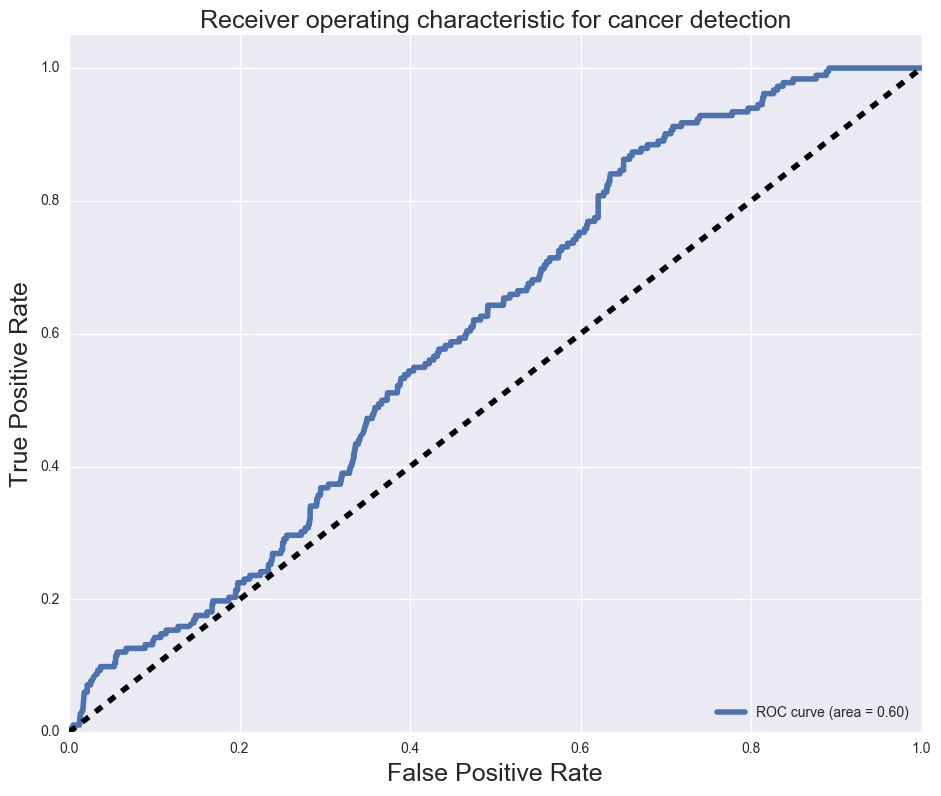

cross val mean score is 0.947577857466


In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=7)
model = svc.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print model.score(X_test, Y_test)
# Y_pp = pd.DataFrame(model.predict_proba(X_test), columns=['class_0_pp','class_1_pp'])
# Y_pp['pred_class_thresh10'] = [1 if x >= 0.05 else 0 for x in Y_pp.class_1_pp.values]
# X_test_df = pd.DataFrame(X_test)
conmat = np.array(confusion_matrix(Y_test, Y_pred, labels=[1,0]))
confusion = pd.DataFrame(conmat, index=[names[0:2]],
                         columns=[names[2:]]) 
# print(Y_pp.iloc[0:10])
print confusion
print(classification_report(Y_test, Y_pred))
# print Y_pp.shape
# print X_test_df.head()
    
Y_score = model.decision_function(X_test)

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(Y_test, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for cancer detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()
print "cross val mean score is", cross_val_score(model, X_train, Y_train, cv=5).mean()
    

### Grid search section

In [45]:
from sklearn.grid_search import GridSearchCV
#cvs = [1,2,3,5,10,15]
max_depth=[3,4,5,6,7]
random_state=range(10,30)
max_features=['auto','sqrt','log2',None]
#[3,15,20,50,66]
grid = GridSearchCV(estimator=gbc, param_grid=dict( max_depth=max_depth,random_state=random_state,max_features=max_features   ))
grid_coef = grid.fit(X, y)
print(grid)
grid.best_score_



GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features='sqrt', max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': ['auto', 'sqrt', 'log2', None], 'random_state': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'max_depth': [3, 4, 5, 6, 7]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)


0.85436893203883491

In [46]:
grid.best_params_


{'max_depth': 3, 'max_features': 'sqrt', 'random_state': 15}